<a href="https://colab.research.google.com/github/Obrepal/POP/blob/master/POP_wroking_A_star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://networkx.guide/algorithms/shortest-path/a-star-search/
https://www.python-graph-gallery.com/322-network-layout-possibilities

https://docs.google.com/drawings/d/1XCCMoto-npLf0uLhvlZrJI9H02t64jWRM-feeSu_YJc/edit

https://networkx.org/documentation/stable/tutorial.html


https://ewarchul.github.io/teaching/pop.html

**Tutaj podam linki do repozytoriów, które mają podobną tematykę co my.**

https://github.com/waldemar99zielinski/USS-Enterprise/blob/master/main.py ten sam tytuł, ale kompletnie coś innego

https://github.com/swierczj/alhe-algorytm-mrowkowy to jest bardzo sensowne z naszego punktu widzenia

https://www.youtube.com/watch?v=X-iSQQgOd1A algorytm mrówkowy







**Co musimy zrobić?**


1.   Wczytywanie pliku, jest w githubie, ewentualnie tak jak tutaj
2.   Implementacja a-gwiazdki

*   Metaheurystyka
*   testy
3.   Implementacja mrówki

*   Metaheurystyka
*   testy

4.   Sprawko 


5. Prezentacja najpóźniej 02.02.2022

# 6. **Dokumentacja końcowa 	Mail z kodem, raportem i danymi 	25.01.2022 23:59**


#. **Lista pytań**

Czy da się zrobić bez dystansu?

Zaproponowana heurystyka czy jest sensowna?

Finding the Shortest Path with A* in An UnknownPhysical Environment






In [ ]:
G[2][0]['weight'] = 5 

G[0][0]['weight']

NameError: ignored

In [ ]:
G[1][0]['weight'] = 10 
#skąd dokąd edge


NameError: ignored

In [ ]:
list(G.neighbors(2))
G.nodes[1]['visited'] #node

NameError: ignored

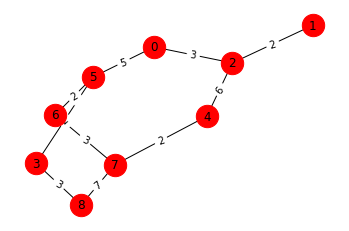

In [356]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


edges = pd.DataFrame({'source' : [2, 4, 5, 3, 0, 2, 5, 4, 7, 3, 6, 4],
                      'target' : [1, 7, 3, 5, 5, 0, 6, 2, 8, 8, 7, 7],
                      'weight' : [2, 2, 3, 2, 5, 3, 2, 6, 7, 3, 3, 2]})

nodes = pd.DataFrame({'node' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                      'name' : ['Foo', 'Bar', 'Baz','Foo', 'Bar', 'Baz','Foo', 'Bar', 'Baz','ee'],
                      'visited' : [0, 0, 0, 0, 0, 0, 0, 0, 0,0],
                      'spice' : [0,17,18,19,16,15,16,17,18,19]
                      })


G = nx.Graph()

G = nx.from_pandas_edgelist(edges, 'source', 'target', 'weight')

nx.set_node_attributes(G, pd.Series(nodes.visited, index=nodes.node).to_dict(), 'visited')
nx.set_node_attributes(G, pd.Series(nodes.name, index=nodes.node).to_dict(), 'name')
nx.set_node_attributes(G, pd.Series(nodes.spice, index=nodes.node).to_dict(), 'spice')


labels = nx.get_edge_attributes(G,"weight")
#pos = nx.spring_layout(G,k=1, iterations=4)
pos=nx.fruchterman_reingold_layout(G)
node_labels = nx.get_node_attributes(G,'spice')
#nx.draw_networkx_labels(G, pos,labels = node_labels)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw(G,pos, with_labels=True,font_color='black',node_color='red',node_size=500)
plt.show()


Pamiętaj o odwiedzonych. To na plus do odwiedzonych. 
Węzły zyskany, krawędzie spalone i parzymy do uzyskania. 
F ile już spaliśimy + ile brakuje 


Koszt spalony ile nam brakuje dalej 

Początkowy dueter 

O nie jest zero

10 uzyskać 
4 > 2  = 9 
4 > 6 = 7 


/Krzysiek
funkcja celu - zdobyty/zuzyty

Zerujemy  na węźle deuter po odwiedzeniu


Networkx 


In [ ]:
goal_function(G, 0, 2,10)

In [ ]:
class Path(object):

    def  __init__(self, road = [], last_node = 0, goal_function = 0 ,fuel_end = 0):
        
      self.road = road
      self.goal_function = goal_function
      self.fuel_end = fuel_end
      self.last_node = last_node

    def append_road(self,next_node):
      self.road.append(next_node)

    def get_road(self):
      return self.road

    def get_goal_function(self):
      return self.goal_function

    def get_fuel_end(self):
      return self.fuel_end
    
    def get_last_node(self):
      return self.road[-1]

    def set_goal_function(self, new_goal_function):
      self.goal_function = new_goal_function

    def set_fuel_end(self, new_fuel_end):
      self.fuel_end = new_fuel_end
    
    
  

     




In [360]:
class Great_storer(object):
  def __init__(self, G, current_roads = []):
    self.current_roads = current_roads
    self.G = G
  
  def add_new_road(self, path):
    self.current_roads.append(path) 
  
  def get_current_roads(self):
    return self.current_roads

  def createPath(self, oldPath, newNode):

    fuel = oldPath.get_fuel_end() + self.G[oldPath.get_last_node()][newNode]['weight']
    if newNode not in oldPath.get_road():
      # print("CHECKE",oldPath.get_road(), newNode)
      fuel -= self.G.nodes[newNode]['spice']
      
      
    goal_function  = oldPath.get_goal_function() - self.G.nodes[newNode]['spice']  - 2* (self.G[oldPath.get_last_node()][newNode]['weight'])
    
    Road = oldPath.get_road() + [newNode]
    newPath = Path(Road, newNode, goal_function, fuel) # na zmęczeniu poprawiłem na [] oraz dodałem linikję pod
    # newPath.append_road(newNode)
    self.current_roads.append(newPath)

  def find_lowest_goal_function(self):
    self.current_roads.sort(key=lambda x: x.get_goal_function(), reverse=True)
    #curr.sort(key=lambda x: x.get_goal_function(), reverse=True)
    return self.current_roads.pop(0)

  def sort_roads(self):
         self.current_roads.sort(key=lambda x: x.get_goal_function(), reverse=True)
        #curr.sort(key=lambda x: x.get_goal_function(), reverse=True)


 

In [368]:
#inicjalizacja
path = Path( [0], 0,  40, 20)
#dodajemy pierwszy, do strera
great_storer = Great_storer(G,[path])
#wyznaczamy sąsiadów
G.neighbors(curr_path.get_last_node())

for i in range(0,60):
  #oblicamy obecny najniższy 
    curr_path = copy.copy(great_storer.find_lowest_goal_function())

    for i in G.neighbors(curr_path.get_last_node()):
      great_storer.createPath(curr_path,i)
      if i == 0 and great_storer.get_current_roads()[-1].get_fuel_end() <= 0:
        print(i,great_storer.get_current_roads()[-1].get_fuel_end(),great_storer.get_current_roads()[-1].get_road())
        break
      
    

# for n in great_storer.get_current_roads():
#   print(n.get_road(),n.get_fuel_end())



0 -5 [0, 2, 1, 2, 0]
0 0 [0, 5, 3, 5, 0]
0 -9 [0, 2, 0, 5, 6, 5, 0]


In [ ]:
curr_path.get_goal_function()

In [ ]:
for n in great_storer.get_current_roads():
    print(n.get_road())


In [279]:
for k in range(0,1):

  curr_path = copy.copy(great_storer.find_lowest_goal_function())
  print(list(G.neighbors(curr_path.get_last_node())))

  # for i in G.neighbors(curr_path.get_last_node()):
  #     great_storer.createPath(curr_path, i)

  for n in great_storer.get_current_roads():
    print(n.get_road())


IndexError: ignored

Tu testowe


In [252]:
from operator import attrgetter
path = Path( [0], 0,  60, 60)
great_storer = Great_storer(G,[path])
great_storer.createPath(path, 2)
# list(G.neighbors(great_storer.get_current_roads()[0].get_last_node()))

In [250]:
curr = great_storer.get_current_roads()

In [222]:
curr.sort(key=lambda x: x.get_goal_function(), reverse=True)

In [251]:
great_storer.find_lowest_goal_function()

In [253]:
for i in curr:
  print(i.get_road(),i.get_goal_function())

[0] 60


In [239]:
import copy

curr_node = copy.deepcopy(great_storer.find_lowest_goal_function())
for i in G.neighbors(curr_node.get_last_node()):
   great_storer.createPath(curr_node, i)


In [189]:
list(G.neighbors(great_storer.find_lowest_goal_function().get_last_node()))

[7, 2]

Jak zadziała to:


***1) przeglądamy zbiór rozwiązań i wybieramy to z najmniejszą wartością funkcji celu, ***

**2) wywołujemy stworzoną funkcję dla wszystkich sąsiadów ostatniego węzła tego rozwiązania,**

3) usuwamy starą ścieżkę, 

4) sprawdzamy czy któres rozwiązanie spełnia kryteria stopu: zebrano paliwo, ścieżka kończy się w punkcie startowym


In [ ]:
from operator import attrgetter

najwygodniej będzie, argumenty G, node z którego zacząć, z którego musimy zacząć 

In [ ]:
great_storer.get_current_roads()

[<__main__.Path at 0x7f2956760050>, <__main__.Path at 0x7f29566e6650>]

In [ ]:
def calc_goal(G ,start, end, act_goal):

    new_goal = act_goal - G.nodes[end]['spice'] + 2*G[start][end]['weight']
    return new_goal

In [ ]:
def A_star(G, start, status):

    # G.nodes[start]['goal_function'] = 60
    
    #wszyscy sądziedzi
    to_visit = list(G.neighbors(start))
    visited = []
    paths = [[[0],[status]]]  * len(to_visit) 
    
    #visited.append(start)
    curr_node = start
    


    #obliaczmy funkcję celu dla każdego z nich, dodajemy obecną 
    for i in G.neighbors(curr_node):
      G.nodes[i]['calc_goal']  = calc_goal(G, curr_node, i, status)
      


    while(to_visit != []):
      print(visited,to_visit)
      
      min = float('inf')
      node_min = float('inf')
      
      #znajdujemy najmniejszą
      for i in to_visit:
          if( G.nodes[i]['calc_goal'] < min ):
              
              min = G.nodes[i]['calc_goal']
              node_min = i

    #     #idziemy do niej, dodajemy że do odwiedzonej usuwamy z do odwiedzenia
      curr_node = node_min
      to_visit.remove(curr_node)
      visited.append(curr_node)
      
      #sprawdzamy znowu dla wszystkich sąsiadów, jeśli nie jest to dodajemy do odwiedzenia, jeśli jeszcze w niej nie byliśmy to liczmy
      for i in list(G.neighbors(curr_node)):
            if(i not in visited and i not in to_visit):
                to_visit.append(i)
            if(i not in visited):
              G.nodes[i]['calc_goal']  = calc_goal(G, curr_node, i, G.nodes[curr_node]['calc_goal'])
            
              if( G.nodes[i]['calc_goal'] < min ):
                  min = G.nodes[i]['calc_goal']
                  node_min = i

                  G.nodes[i]['prev_node'] = curr_node
                  print( G.nodes[i]['calc_goal'])
        
              




                  # prev_goal_function = G.nodes[curr_node]['goal_function']
                  # goal_function = prev_goal_function + heuristic(G, curr_node, i)
                  # if( goal_function < min):
                  #     min = G.nodes[curr_node]['goal_function'] + heuristic(G, curr_node, i)
                      #G.nodes[i]['prev_node'] = curr_node
                  #     G.nodes[i]['goal_function']  = 50
                      

               

In [ ]:
def get_path(G, start,end):
    temp = end
    path = []
    while( G.nodes[temp]['prev_node'] != ""):
        path.insert(0, temp)
        temp = G.nodes[temp]['prev_node']
    path.insert(0, temp)
    path.insert(0, start)
    print(path)

In [ ]:
 G.nodes[2]['prev_node']

In [ ]:
A_star(G, 0, 60)

[] [5, 2]
55
[2] [5, 1, 0, 4]
[2, 1] [5, 0, 4]
[2, 1, 0] [5, 4]
59
[2, 1, 0, 5] [4, 3, 6]
57
[2, 1, 0, 5, 3] [4, 6, 8]
[2, 1, 0, 5, 3, 8] [4, 6, 7]
61
[2, 1, 0, 5, 3, 8, 6] [4, 7]
59
[2, 1, 0, 5, 3, 8, 6, 7] [4]


In [ ]:
for path in nx.all_simple_paths(G, source=0, target=1):
       print(path)

In [ ]:
def get_path(G, start):
    temp = start
    path = []
    while( G.nodes[temp]['prev_node'] != ""):
        path.insert(0, temp)
        temp = G.nodes[temp]['prev_node']
    path.insert(0, temp)
    path.insert(0, start)
    print(path)

BRUDNOPIS

def heuristic(G, start, end,status):
  
    lost = G[start][end]['weight']
    gain = G.nodes[end]['spice']
    status = status - gain + lost
    return status

    def goal_function(G, start, end,status):
  return heuristic(G, start, end,status) + G[start][end]['weight']


  from io import DEFAULT_BUFFER_SIZE
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd


k = nx.Graph()
k.add_node(1, pos = (2,2))
k.add_node(2, pos = (1,4))
k.add_node(3, pos = (-1,4))
k.add_node(4, pos = (5,4))
k.add_node(5, pos = (10,5))
k.add_node(6, pos = (8,6))
k.add_node(7, pos = (9,7))
k.add_node(20, pos = (10,17))


k.add_weighted_edges_from([(1, 3,  5),(2, 1,  10),(4, 6,  3),(5, 1,  11),(3, 1,  5),(2, 4,  1),(2, 3,  3),(6, 1,  6),(6, 7,  3),(5, 7,  8),(20, 7,  8)])

pos = nx.get_node_attributes(k, "pos")
labels = nx.get_edge_attributes(k,"weight")

nx.draw_networkx_edge_labels(k,pos,edge_labels=labels)
nx.draw(k,pos, with_labels=True)
plt.show()

MRÓWKOWY ROZKMINY
Kryterium stopu - zebrany deuter + od x iteracji nie znaleziono lepszej drogi